# Telco Churn Analysis

**Dataset Info:**
Sample Data Set containing Telco customer data and showing customers left last month

In [1]:
#import the required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline




**Load the data file **

In [2]:
telco_base_data = pd.read_csv(r"C:\Users\sudarsan\Downloads\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
telco_base_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
telco_base_data.shape

(7043, 21)

In [5]:
telco_base_data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [6]:
# Checking the data types of all the columns
telco_base_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

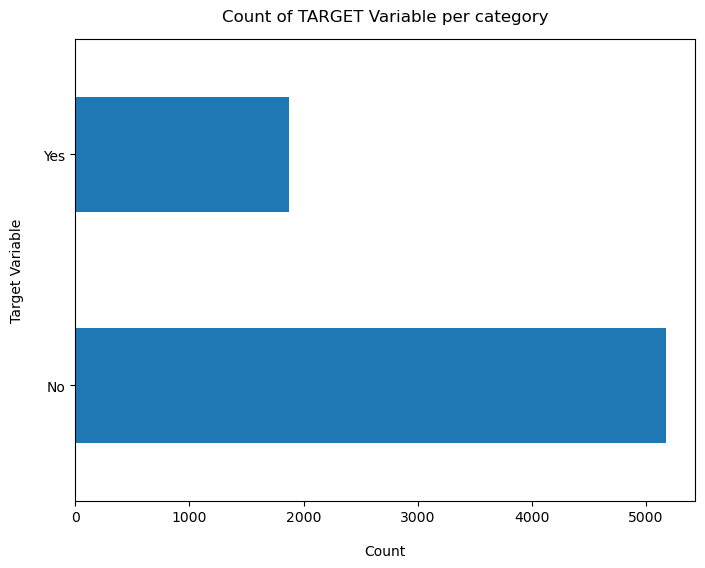

In [7]:
telco_base_data['Churn'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

In [8]:
100*telco_base_data['Churn'].value_counts()/len(telco_base_data['Churn'])

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

In [9]:
telco_base_data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

* Data is highly imbalanced, ratio = 73:27


In [10]:
# Concise Summary of the dataframe, as we have too many columns, we are using the verbose = True mode
telco_base_data.info(verbose = True) 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


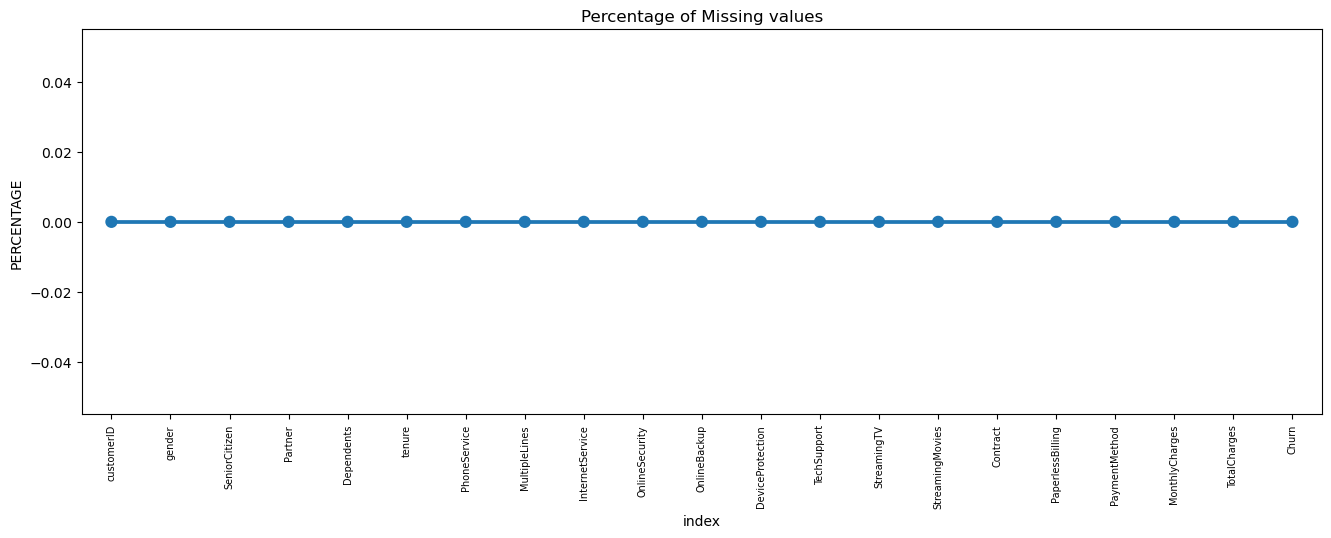

In [11]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'telco_base_data' is your DataFrame

# Calculate the percentage of missing values for each column
missing = pd.DataFrame((telco_base_data.isnull().sum()) * 100 / telco_base_data.shape[0]).reset_index()

# Set up the figure size
plt.figure(figsize=(16, 5))

# Create a point plot to visualize the percentage of missing values
ax = sns.pointplot(x='index', y=0, data=missing)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, fontsize=7)

# Set plot title and labels
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")

# Display the plot
plt.show()


## Data Cleaning


**1.** Create a copy of base data for manupulation & processing

In [13]:
telco_data = telco_base_data.copy()

**2.** Total Charges should be numeric amount. Let's convert it to numerical data type

In [14]:
telco_data.TotalCharges = pd.to_numeric(telco_data.TotalCharges, errors='coerce')
telco_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

**3.** As we can see there are 11 missing values in TotalCharges column. 

**4. Missing Value Treatement**

 it is safe  to ignore miss value from further processing.

In [15]:
#Removing missing values 
telco_data.dropna(how = 'any', inplace = True)

#telco_data.fillna(0)

In [16]:
telco_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


**5.** Divide customers into bins based on tenure e.g. for tenure < 12 months: assign a tenure group if 1-12, for tenure between 1 to 2 Yrs, tenure group of 13-24; so on...

In [17]:
# Get the max tenure
print(telco_data['tenure'].max()) #72

72


In [18]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

telco_data['tenure_group'] = pd.cut(telco_data.tenure, range(1, 80, 12), right=False, labels=labels)

In [19]:
telco_data['tenure_group'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_group, dtype: int64

**6.** Remove columns not required for processing

In [20]:
#drop column customerID and tenure
telco_data.drop(columns= ['customerID','tenure'], axis=1, inplace=True)
telco_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


## Data Exploration
**1. ** Plot distibution of individual predictors by churn

### Univariate Analysis

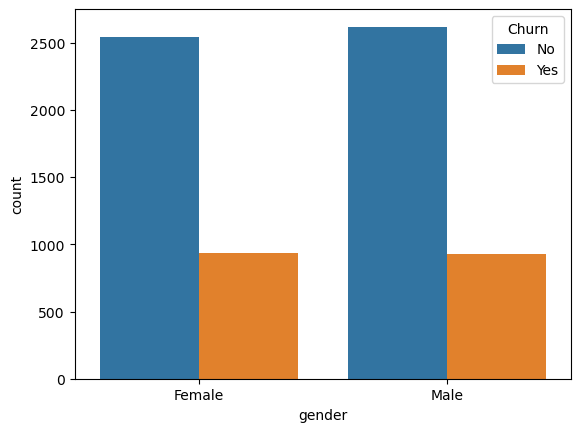

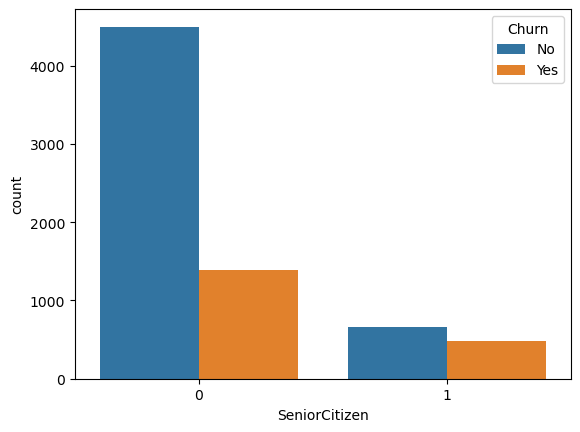

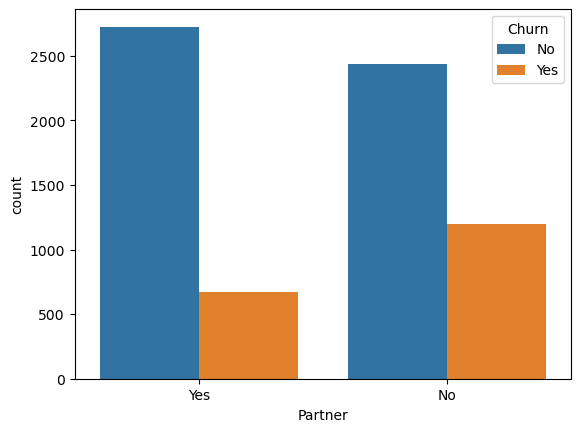

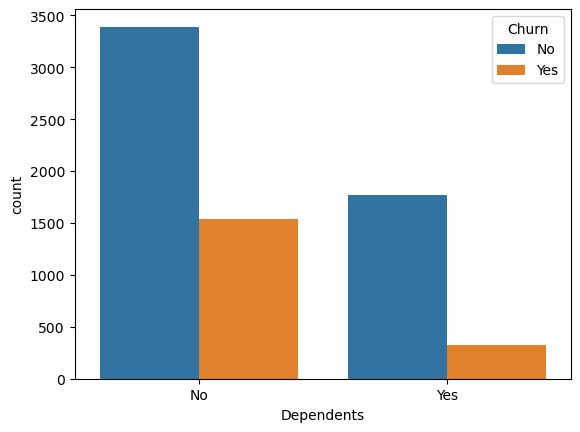

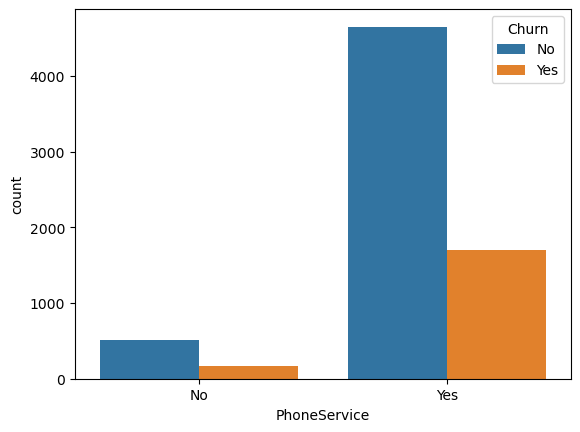

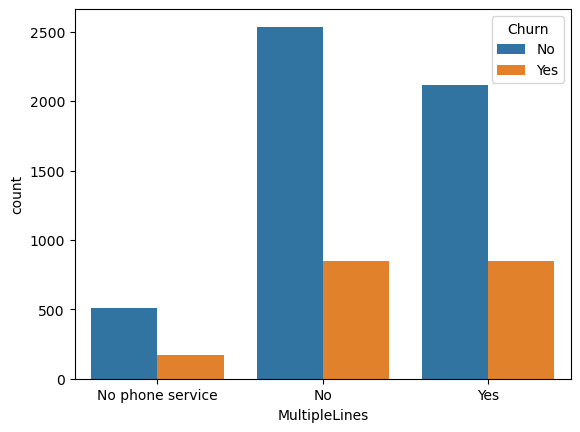

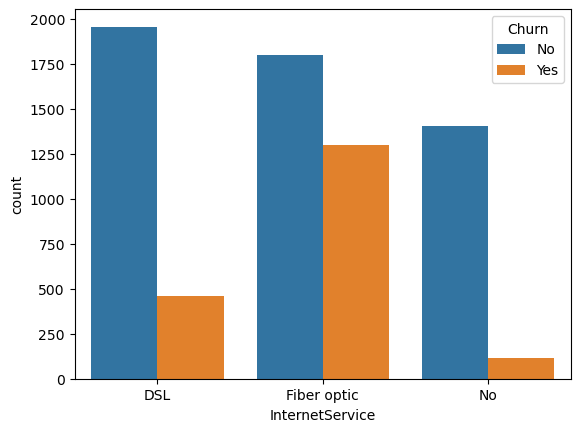

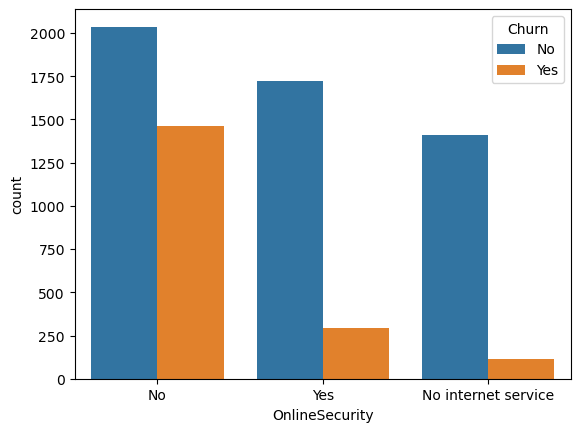

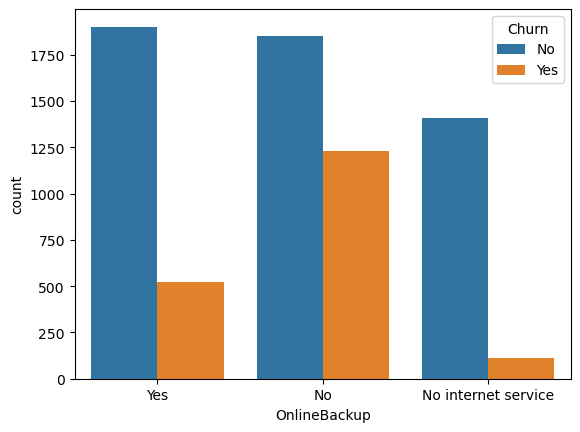

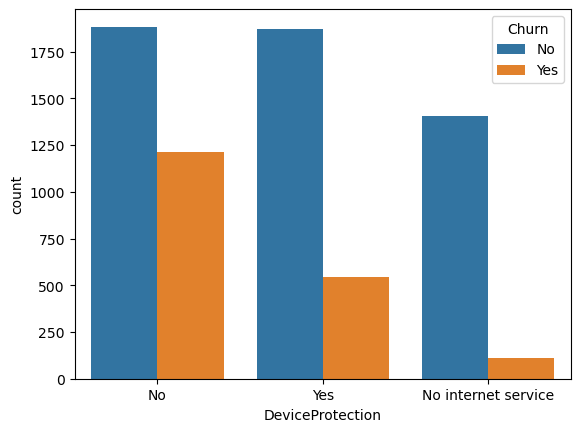

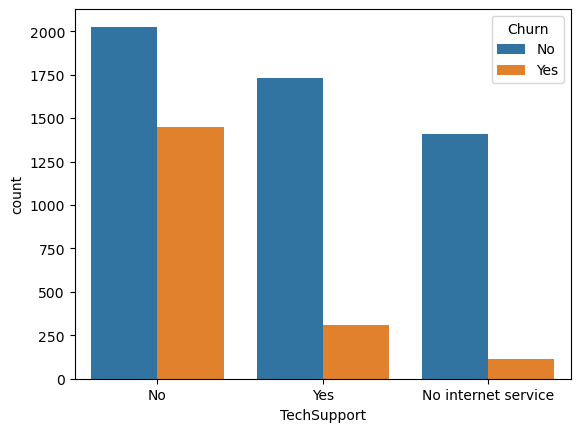

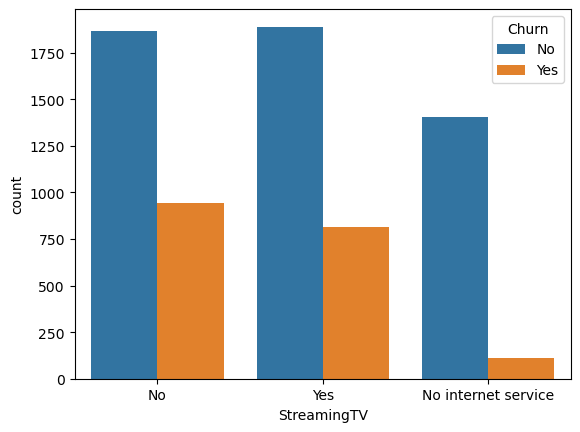

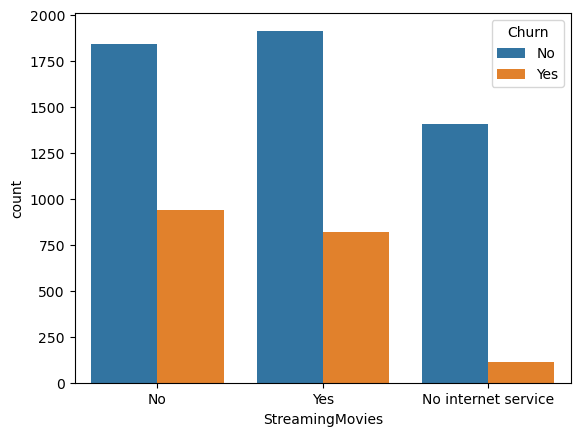

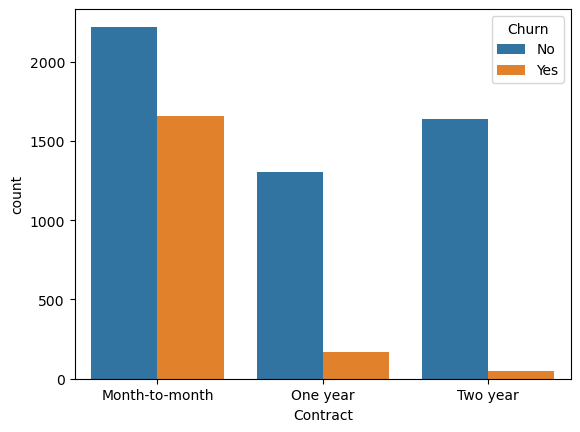

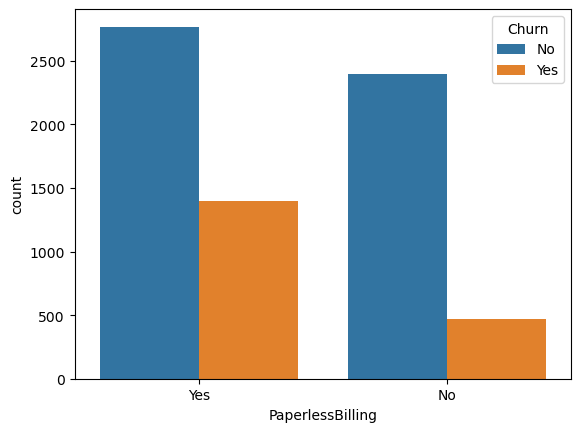

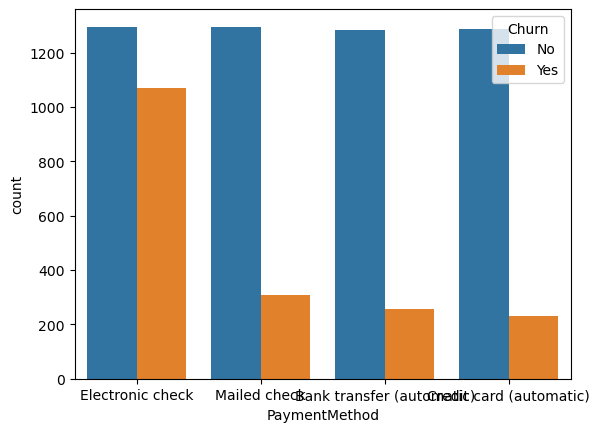

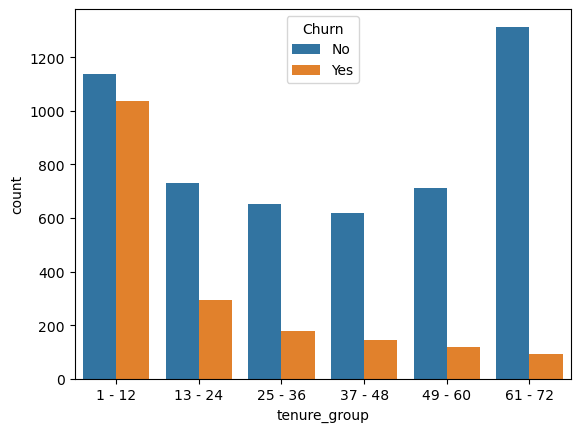

In [21]:
for i, predictor in enumerate(telco_data.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=telco_data, x=predictor, hue='Churn')

**2.** Convert the target variable 'Churn'  in a binary numeric variable i.e. Yes=1 ; No = 0

In [22]:
telco_data['Churn'] = np.where(telco_data.Churn == 'Yes',1,0)

In [23]:
telco_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


**3.** Convert all the categorical variables into dummy variables

In [24]:
telco_data_dummies = pd.get_dummies(telco_data)
telco_data_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


**11. Build a corelation of all predictors with 'Churn' **

<Axes: >

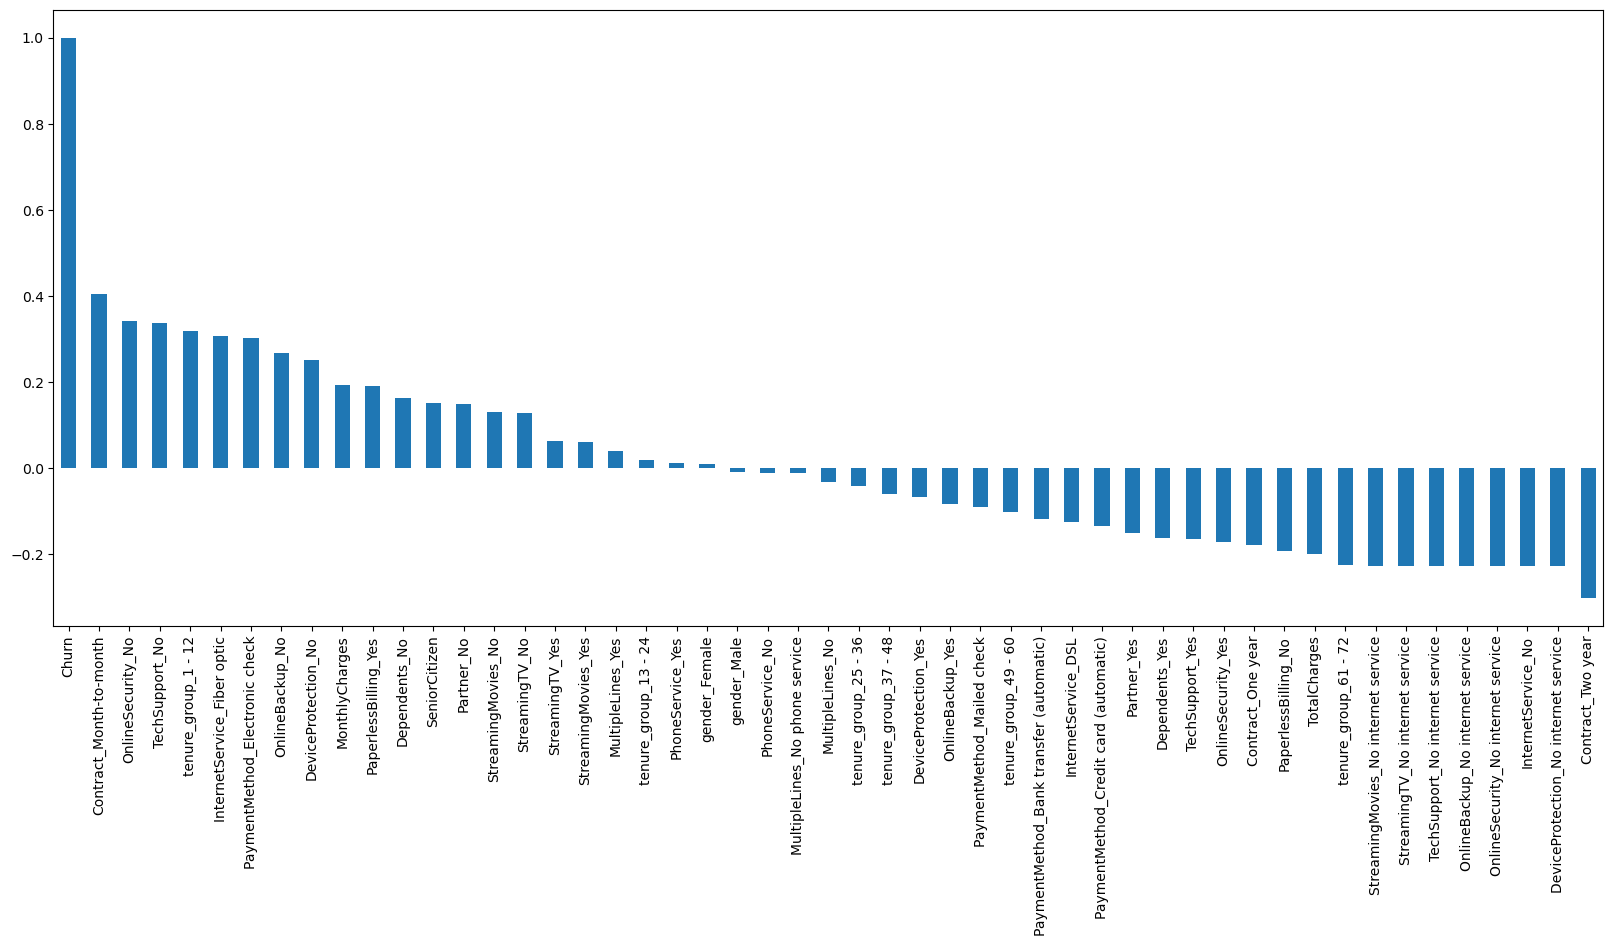

In [25]:
plt.figure(figsize=(20,8))
telco_data_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

Correlation Matrix is : 
                                         SeniorCitizen  MonthlyCharges  \
SeniorCitizen                                 1.000000        0.219874   
MonthlyCharges                                0.219874        1.000000   
TotalCharges                                  0.102411        0.651065   
Churn                                         0.150541        0.192858   
gender_Female                                 0.001819        0.013779   
gender_Male                                  -0.001819       -0.013779   
Partner_No                                   -0.016957       -0.097825   
Partner_Yes                                   0.016957        0.097825   
Dependents_No                                 0.210550        0.112343   
Dependents_Yes                               -0.210550       -0.112343   
PhoneService_No                              -0.008392       -0.248033   
PhoneService_Yes                              0.008392        0.248033   
MultipleLines

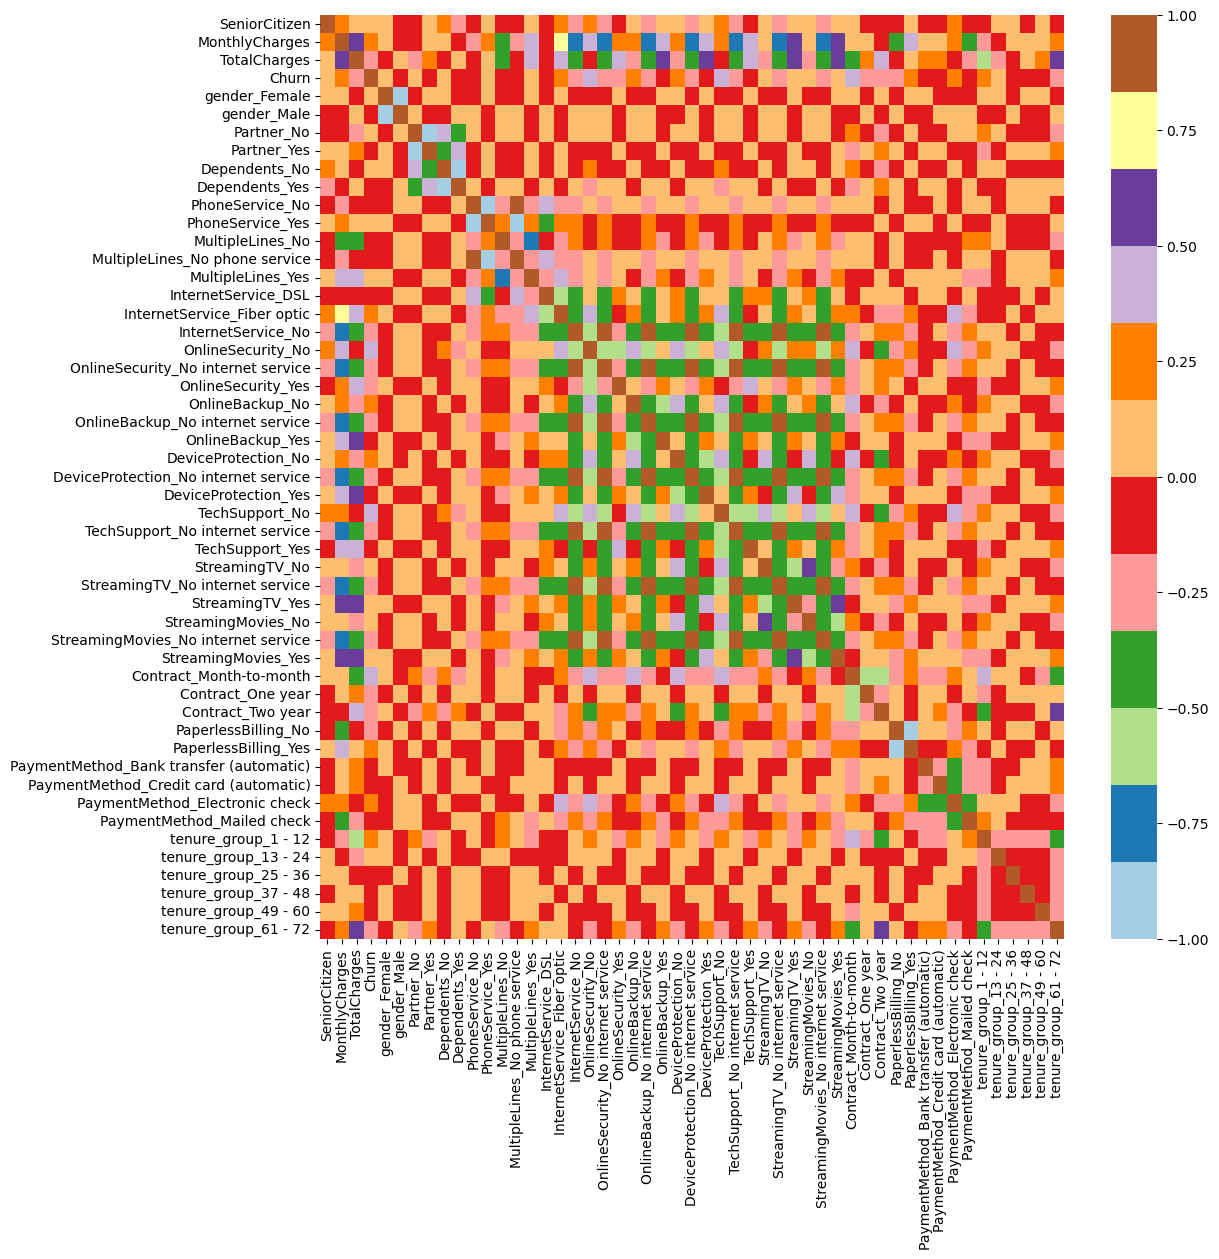

In [104]:
plt.figure(figsize=(12,12))
sns.heatmap(telco_data_dummies.corr(), cmap="Paired")
matrix = telco_data_dummies.corr()
 # print correlation matrix
print("Correlation Matrix is : ")
print(matrix)

### Bivariate Analysis

In [27]:
new_df1_target0=telco_data.loc[telco_data["Churn"]==0]
new_df1_target1=telco_data.loc[telco_data["Churn"]==1]

In [28]:
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

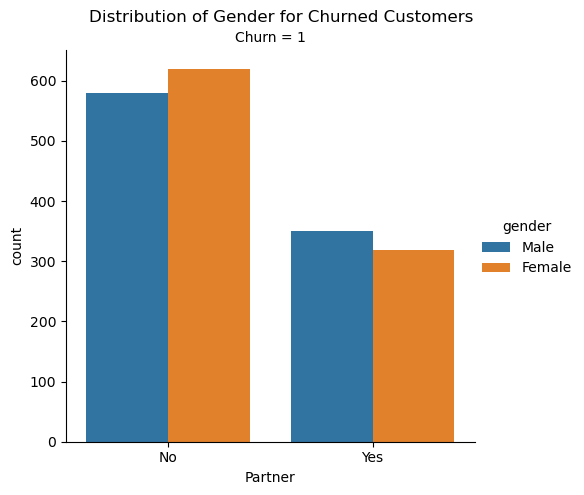

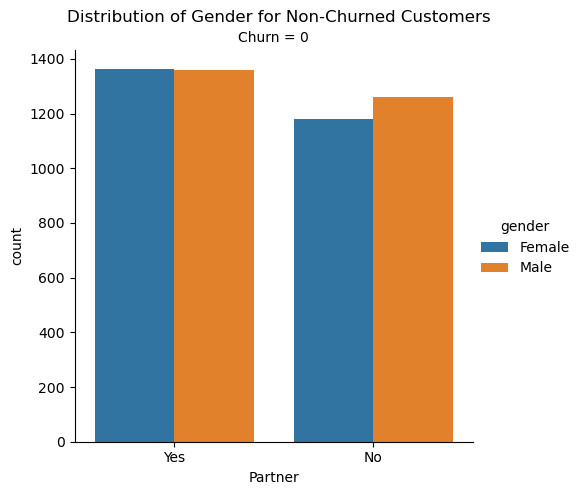

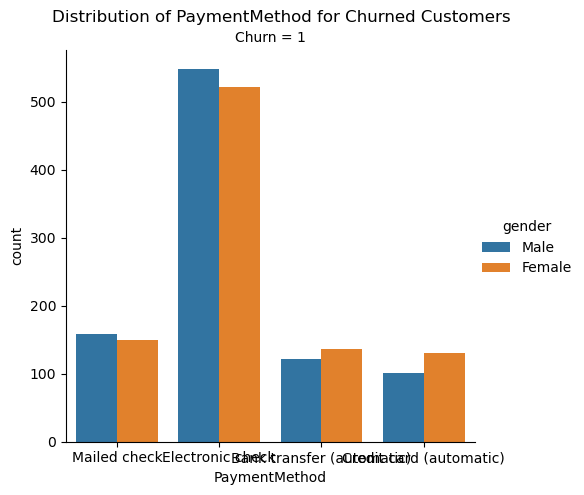

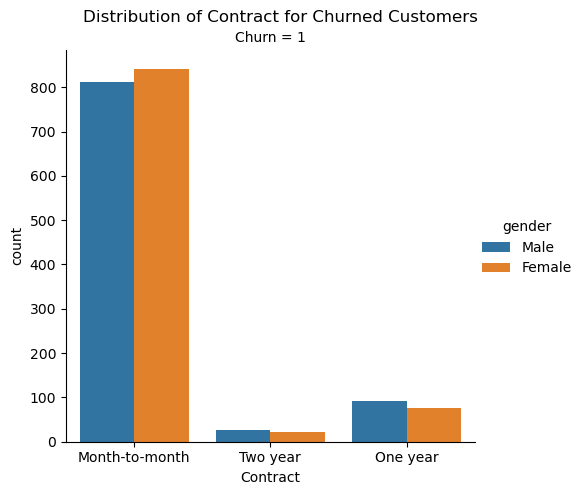

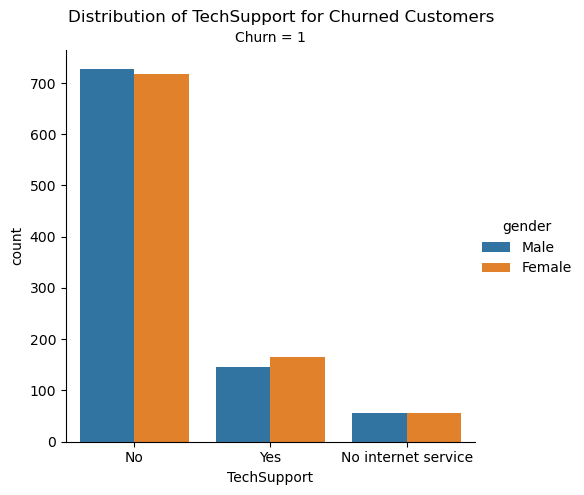

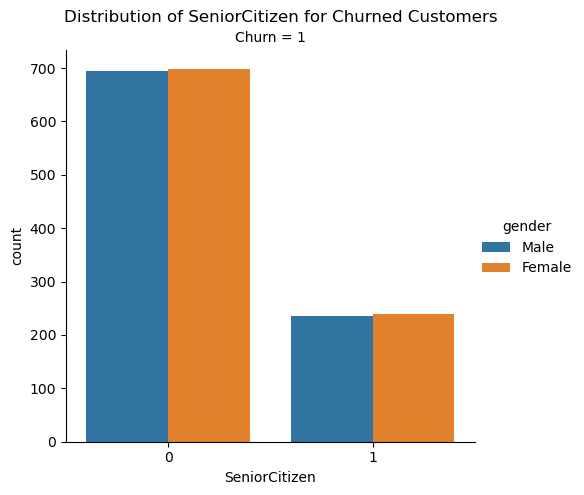

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'new_df1_target1' and 'new_df1_target0' are your DataFrames

# Distribution of Gender for Churned Customers
sns.catplot(x='Partner', kind='count', hue='gender', data=new_df1_target1, col='Churn')
plt.subplots_adjust(top=0.9)  # Adjust the title position
plt.suptitle('Distribution of Gender for Churned Customers')

# Distribution of Gender for Non-Churned Customers
sns.catplot(x='Partner', kind='count', hue='gender', data=new_df1_target0, col='Churn')
plt.subplots_adjust(top=0.9)  # Adjust the title position
plt.suptitle('Distribution of Gender for Non-Churned Customers')

# Distribution of PaymentMethod for Churned Customers
sns.catplot(x='PaymentMethod', kind='count', hue='gender', data=new_df1_target1, col='Churn')
plt.subplots_adjust(top=0.9)  # Adjust the title position
plt.suptitle('Distribution of PaymentMethod for Churned Customers')

# Distribution of Contract for Churned Customers
sns.catplot(x='Contract', kind='count', hue='gender', data=new_df1_target1, col='Churn')
plt.subplots_adjust(top=0.9)  # Adjust the title position
plt.suptitle('Distribution of Contract for Churned Customers')

# Distribution of TechSupport for Churned Customers
sns.catplot(x='TechSupport', kind='count', hue='gender', data=new_df1_target1, col='Churn')
plt.subplots_adjust(top=0.9)  # Adjust the title position
plt.suptitle('Distribution of TechSupport for Churned Customers')

# Distribution of SeniorCitizen for Churned Customers
sns.catplot(x='SeniorCitizen', kind='count', hue='gender', data=new_df1_target1, col='Churn')
plt.subplots_adjust(top=0.9)  # Adjust the title position
plt.suptitle('Distribution of SeniorCitizen for Churned Customers')

# Show the plots
plt.show()


In [30]:
telco_data_dummies.to_csv('tel_churn.csv')

## MODEL BUILDING

In [31]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN

In [32]:
df=pd.read_csv("tel_churn.csv")
df.head()

,Unnamed: 0,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,0,29.85,29.85,0,1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,0
1,1,0,56.95,1889.50,0,0,1,1,0,1,...,0,0,0,1,0,0,1,0,0,0
2,2,0,53.85,108.15,1,0,1,1,0,1,...,0,0,0,1,1,0,0,0,0,0
3,3,0,42.30,1840.75,0,0,1,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,4,0,70.70,151.65,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0


In [33]:
df=df.drop('Unnamed: 0',axis=1)

In [34]:
x=df.drop('Churn',axis=1)
x

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,1,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,1,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,0,1,1,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,0,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,84.80,1990.50,0,1,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,0
7028,0,103.20,7362.90,1,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
7029,0,29.60,346.45,1,0,0,1,0,1,1,...,0,0,1,0,1,0,0,0,0,0
7030,1,74.40,306.60,0,1,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,0


In [35]:
y=df['Churn']
y

0       0
1       0
2       1
3       0
4       1
       ..
7027    0
7028    0
7029    0
7030    1
7031    0
Name: Churn, Length: 7032, dtype: int64

##### Train Test Split

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

#### Decision Tree Classifier

In [37]:
model_dt=DecisionTreeClassifier()
model_dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [87]:
y_pred=model_dt.predict(x_test)
y_pred
model_dt.score(x_test,y_test)
model_score_r1 = model_dt.score(x_test, y_test)
print(model_score_r1)
print(classification_report(y_test, y_pred, labels=[0,1]))

0.7334754797441365
              precision    recall  f1-score   support

           0       0.81      0.82      0.82      1014
           1       0.52      0.50      0.51       393

    accuracy                           0.73      1407
   macro avg       0.67      0.66      0.66      1407
weighted avg       0.73      0.73      0.73      1407



Acciracy: 0.9341317365269461
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       551
           1       0.94      0.94      0.94       618

    accuracy                           0.93      1169
   macro avg       0.93      0.93      0.93      1169
weighted avg       0.93      0.93      0.93      1169

confusion matrix
[[512  39]
 [ 38 580]]


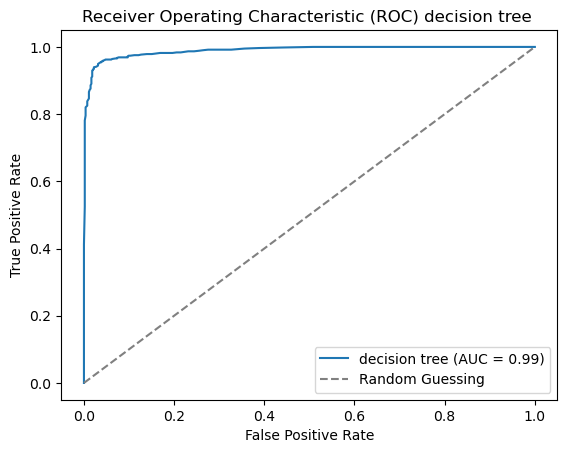

In [101]:
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve,auc

# Assuming 'x' and 'y' are your feature matrix and target variable, respectively

# Resample using SMOTEENN
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(x, y)

# Split the resampled data into training and testing sets
xr_train, xr_test, yr_train, yr_test = train_test_split(X_resampled, y_resampled, test_size=0.2)

# Create and train the Decision Tree model
model_dt_smote = DecisionTreeClassifier()
model_dt_smote.fit(xr_train, yr_train)

# Make predictions on the test set
yr_predict = model_dt_smote.predict(xr_test)

# Evaluate the model
model_score_r = model_dt_smote.score(xr_test, yr_test)
print("Acciracy:", model_score_r)
print(metrics.classification_report(yr_test, yr_predict))
print("confusion matrix")
print(metrics.confusion_matrix(yr_test, yr_predict))

# Get predicted probabilities for Random Forest
y_prob_rf_smote = model_rf_smote.predict_proba(xr_test1)[:, 1]

#  ROC curve
fpr_rf_smote, tpr_rf_smote, _ = roc_curve(yr_test1, y_prob_rf_smote)
roc_auc_rf_smote = auc(fpr_rf_smote, tpr_rf_smote)

# Plot the ROC curve
plt.plot(fpr_rf_smote, tpr_rf_smote, label=f'decision tree (AUC = {roc_auc_rf_smote:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Guessing')

plt.title('Receiver Operating Characteristic (ROC) decision tree ')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()




## RANDOM FOREST CLASSIFIER

In [90]:
from sklearn.ensemble import RandomForestClassifier
model_rf=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)
model_rf.fit(x_train,y_train)
y_pred=model_rf.predict(x_test)
model_score_r1 = model_rf.score(xr_test1, yr_test1)
print('accuracy',model_score_r1)
print(classification_report(y_test, y_pred, labels=[0,1]))


accuracy 0.7315608919382505
              precision    recall  f1-score   support

           0       0.81      0.93      0.86      1014
           1       0.69      0.43      0.53       393

    accuracy                           0.79      1407
   macro avg       0.75      0.68      0.70      1407
weighted avg       0.78      0.79      0.77      1407



accuracy 0.9576490924805532
classification report
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       545
           1       0.96      0.96      0.96       612

    accuracy                           0.96      1157
   macro avg       0.96      0.96      0.96      1157
weighted avg       0.96      0.96      0.96      1157

confusion matrix
[[522  23]
 [ 26 586]]


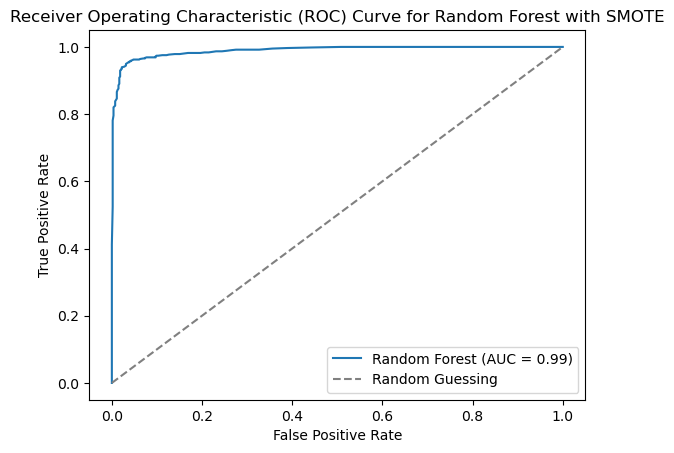

In [95]:
sm = SMOTEENN()
X_resampled1, y_resampled1 = sm.fit_resample(x,y)
xr_train1,xr_test1,yr_train1,yr_test1=train_test_split(X_resampled1, y_resampled1,test_size=0.2)
model_rf_smote=RandomForestClassifier()
model_rf_smote.fit(xr_train1,yr_train1)
yr_predict1 = model_rf_smote.predict(xr_test1)
model_score_r1 = model_rf_smote.score(xr_test1, yr_test1)
print("accuracy",model_score_r1)
print("classification report")
print(metrics.classification_report(yr_test1, yr_predict1))
print("confusion matrix")
print(metrics.confusion_matrix(yr_test1, yr_predict1))

y_prob_rf_smote = model_rf_smote.predict_proba(xr_test1)[:, 1]

# Random Forest ROC curve
fpr_rf_smote, tpr_rf_smote, _ = roc_curve(yr_test1, y_prob_rf_smote)
roc_auc_rf_smote = auc(fpr_rf_smote, tpr_rf_smote)

# Plot the ROC curve
plt.plot(fpr_rf_smote, tpr_rf_smote, label=f'Random Forest (AUC = {roc_auc_rf_smote:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Guessing')

plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest with SMOTE')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Assuming x_train, x_test, y_train, y_test are your feature and target variables

# Create a k-NN classifier with k=5 (you can adjust the number of neighbors)
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the k-NN classifier
knn_classifier.fit(x_train, y_train)

# Make predictions on the test set
y_pred = knn_classifier.predict(x_test)

# Evaluate the accuracy of the k-NN classifier
accuracy = knn_classifier.score(x_test, y_test)
print(f"Accuracy: {accuracy}")

# Print classification report
print(classification_report(y_test, y_pred, labels=[0, 1]))
print(metrics.confusion_matrix(yr_test1, yr_predict1))


Accuracy: 0.7583511016346838
              precision    recall  f1-score   support

           0       0.80      0.89      0.84      1014
           1       0.60      0.41      0.49       393

    accuracy                           0.76      1407
   macro avg       0.70      0.65      0.66      1407
weighted avg       0.74      0.76      0.74      1407

[[510  55]
 [ 19 591]]


In [59]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled1, y_resampled1 = smote.fit_resample(x, y)

xr_train1, xr_test1, yr_train1, yr_test1 = train_test_split(X_resampled1, y_resampled1, test_size=0.2)

knn_classifier_smote = KNeighborsClassifier(n_neighbors=5)
knn_classifier_smote.fit(xr_train1, yr_train1)

yr_predict1 = knn_classifier_smote.predict(xr_test1)

conf_matrix1 = confusion_matrix(yr_test1, yr_predict1)
print("Confusion Matrix:")
print(conf_matrix1)

accuracy1 = knn_classifier_smote.score(xr_test1, yr_test1)
print(f"\nAccuracy: {accuracy1}")

print("\nClassification Report:")
print(classification_report(yr_test1, yr_predict1, labels=[0, 1]))


Confusion Matrix:
[[748 301]
 [146 871]]

Accuracy: 0.7836398838334947

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.71      0.77      1049
           1       0.74      0.86      0.80      1017

    accuracy                           0.78      2066
   macro avg       0.79      0.78      0.78      2066
weighted avg       0.79      0.78      0.78      2066



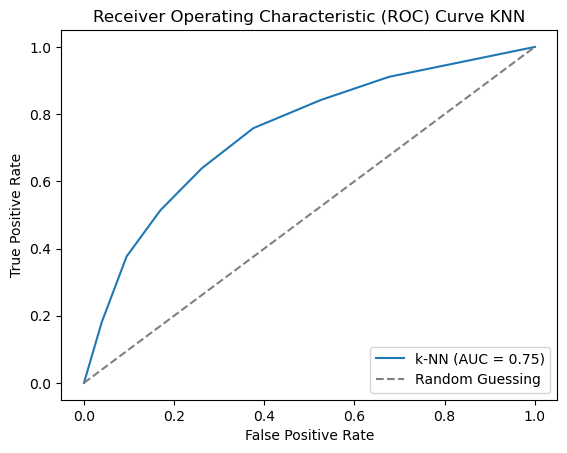

In [106]:
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)
plt.plot(fpr_knn, tpr_knn, label=f'k-NN (AUC = {roc_auc_knn:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Guessing')

plt.title('Receiver Operating Characteristic (ROC) Curve KNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


In [ ]:
Z